In [76]:
import pandas as pd
import matplotlib as mat
import seaborn as sea
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model

In [77]:
# ------------------------------------ Part 1 - Data Exploration and Preprocessing ---------------------------------------------------

    # Disclaimer: Some of this code/comments were taken from my submission of the first Titanic Dataset Assignment

In [78]:
# -------- Load the Dataset and Initial Exploration --------
titanic = pd.read_csv('titanic.csv')
titanic.head() # shows the first 5 rows to get the layout of the datasetu

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
# Defining Basic Information
print("Basic Info: ")
print(titanic.info()) # gives basic information about dataset, e.g # of columns and rows, # of non-null entries, and types

# -------- Categorize the Variables ---------
    # Name           |    # of Unique values        |       Type

    # PassengerId                5                           Continuous
    # Survived                   2                           Categorical
    # Pclass                     2                           Categorical
    # Name                       5                           Categorical
    # Sex                        2                           Categorical
    # Age                        4                           Continuous
    # SibSp                      2                           Categorical
    # Parch                      1                           Categorical
    # Ticket                     5                           Categorical
    # Fare                       5                           Continuous
    # Cabin                      3                           Categorical
    # Embarked                   3                           Categorical

    # brief summary of the datasets structure and variable types
        # There are 12 entities (or columns) in the dataset, which are listed above,
        # and of those entities 9 of them are categorical while 3 are continuous. 
        # Further, there are 891 instances in the dataset.

Basic Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [80]:
# Summary Statistics

# Defining Continuous Variables
# continuous_vars = ['Age', 'Fare', 'PassengerId']
# decided to omit PassengerId because it is different for every passenger (high cardinality)
# and thus does not produce any patterns or take part in any relationships.
continuous_vars = ['Age', 'Fare']

# Displaying continuous Summary Statistics
continuous_stats = titanic[continuous_vars].describe()
print(continuous_stats)

# Defining Categorical Variables
# categorical_vars = ['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
# Decided to omit Name, Ticket, and Cabin from dataset.
# I omitted Name and ticket because like passengerID, they are unique to every passenger (high cardinality)
# and thus does not produce any patterns or take part in any relationships. I also decided to omit Cabin 
# because while it could have relevancy in terms of locations of passengers, it is too incomplete and specific
# that it would not expose anything in summary statistics or visualizations.
categorical_vars = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Displaying Categorical Frequency Counts
for var in categorical_vars:
    print(titanic[var].value_counts())
    print()

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200
Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



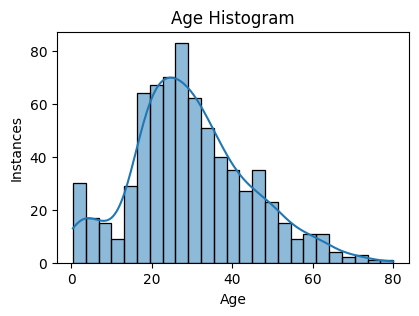

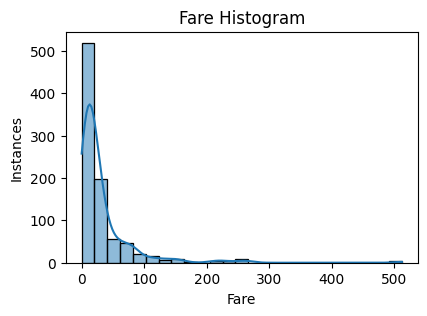

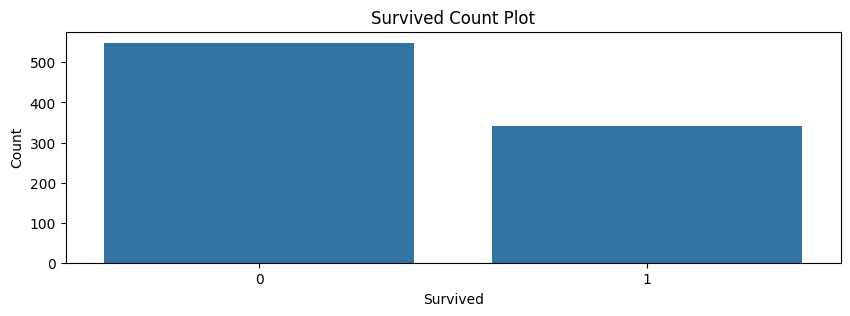

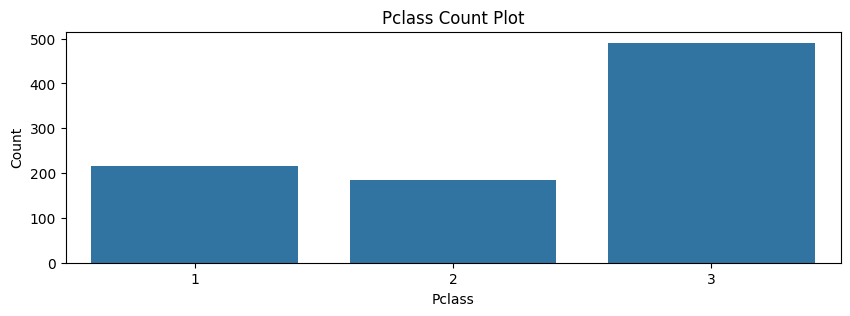

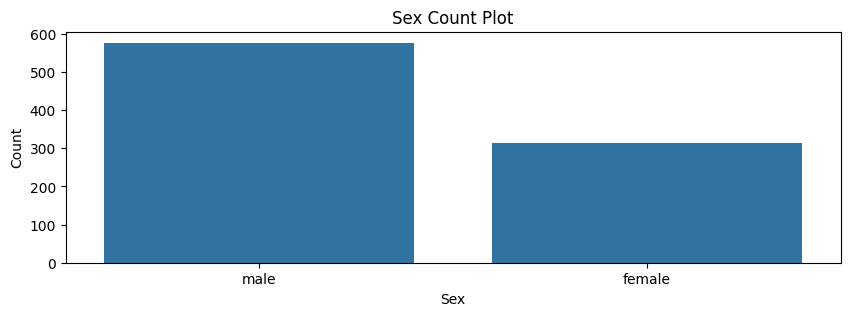

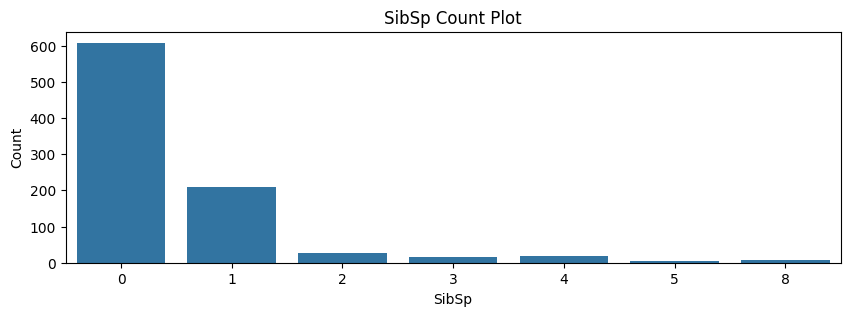

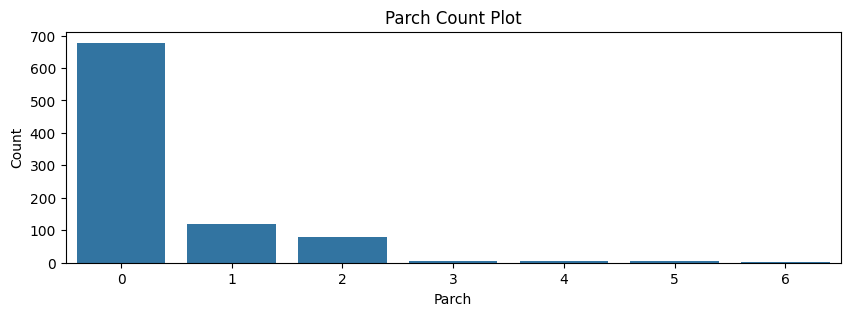

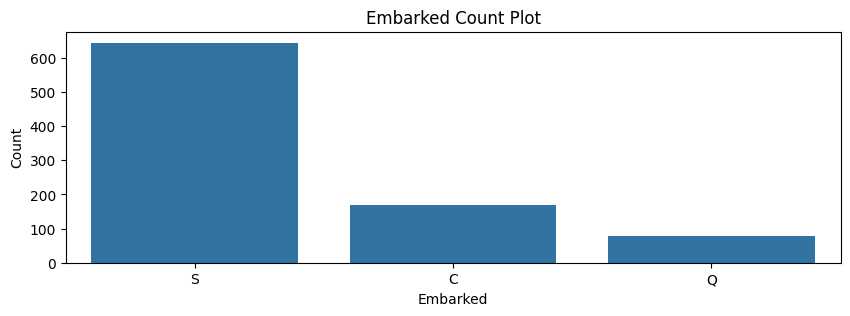

In [81]:
# Visualizations 

# Continuous Variables - Creating Histogram for every continuous variable
for var in continuous_vars:
    mat.pyplot.figure(figsize = (10, 3))
    mat.pyplot.subplot(1, 2, 1)
    sea.histplot(titanic[var], kde = True, bins = 25)
    mat.pyplot.title(f'{var} Histogram')
    mat.pyplot.xlabel(var)
    mat.pyplot.ylabel('Instances')

# Categorical Variables - Creating Count Plots for every categorical variable
for var in categorical_vars:
    mat.pyplot.figure(figsize = (10, 3))
    sea.countplot(x = var, data = titanic)
    mat.pyplot.title(f'{var} Count Plot')
    mat.pyplot.xlabel(var)
    mat.pyplot.ylabel("Count")

In [82]:
# -------- Handling Missing Values --------
# # of null values in Entities
# if this code block is executed after the next one, it will take the updated version of the dataset (nulls handled) and not the original
print("# of null values: ")
print(titanic.isnull().sum())
print()

print("Age Skew: ", titanic['Age'].skew())
print()
print("Fare Skew: ", titanic['Fare'].skew())

# of null values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age Skew:  0.38910778230082704

Fare Skew:  4.787316519674893


In [83]:
# Handling Age Missing Values

# Checking the skew of the Age entity to determine which imputation method to use.
# Since there is a slight skew, I will employ median imputation since the mean and mode
# values might be negatively influenced (in terms of accuracy) by the skew.
print("Age Skew: ", titanic['Age'].skew())
print()

median_age = titanic['Age'].median() # stores the median value for age
titanic.fillna({'Age': median_age}, inplace = True) # fills the null values in with the median and inplace changes the original dataset

# Handling Embarked Missing Values

# Since Embarked is a categorical value we dont have to worry about a skew. Further, since
# embarked only has two missing values, we can just use the mode and replace the null values 
# with it so that the distribution of data is still kept relatively the same.
mode_embarked = titanic['Embarked'].mode()[0] # stores the first mode value (most common) for embarked
titanic.fillna({'Embarked': mode_embarked}, inplace = True) # fills the null values in with mode and inplace changes the original dataset

# Handling Cabin Missing Values

# Since Cabin is a categorical value we dont have to worry about a skew. Further, since Cabin 
# is missing about around 80% of its data we cannot impute the missing values because it could
# very likely lead to inaccuracies in analysis. As such, I believe that the right course of action
# is to just mark the values that are missing with a flag to indicate missing values. 
titanic.fillna({'Cabin': 'N/A'}, inplace = True) # fills the null values in with flag and inplace changes the original dataset

# Null Handling Verification
print("# of null values After imputation: ")
print(titanic.isnull().sum())

Age Skew:  0.38910778230082704

# of null values After imputation: 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [84]:
# -------- Handling Outliers --------

# Checking the skew of the relevant continuous values to determine which detection method to use. 
print("Age Skew: ", titanic['Age'].skew())
print()
print("Fare Skew: ", titanic['Fare'].skew())

# Outlier Detection Rationale
# Both Age and Fare seem to have right skews which would imply using the IQR method would be most effective. 
# However, I believe that because IQR looks at the 25th and 75th percentiles, it would most likely assume first
# class fares or free tickets to be wrongly outliers when in reality it is significant to notice that a small 
# amount of people did in fact pay/didnt pay for their respective classes. Further, since most passengers paid
# within the same range when using the z-score for fare it would look more like a normal distribution when using Z-score. 
# As for age, IQR is the right approach because there is a good spread of ages which shouldnt deviate by much.

# Age IQR Dectection
Q1 = titanic['Age'].quantile(0.25)
Q3 = titanic['Age'].quantile(0.75)
IQR = Q3 - Q1
bound_low = Q1 - 1.5 * IQR
bound_high = Q3 + 1.5 * IQR
outliers_age = titanic[(titanic['Age'] < bound_low) | (titanic['Age'] > bound_high)]

# Fare Z-score Detection
mean_fare = titanic['Fare'].mean()
std_fare = titanic['Fare'].std()
zscr_fare = (titanic['Fare'] - mean_fare) / std_fare
outliers_fare = titanic[np.abs(zscr_fare) > 3]

# Outlier Handling Rationale
# I chose capping for fare because i thought that it would be best to keep most of the data and only remove those
# that impact the statistical values. Because the expensive fares still hold statistical value I chose to preserve
# as much as i can while still removing those that negatively affect the accuracy of future analysis. I chose Log
# transformation for age to bring the distribution closer to a normal distribution and help reduce the amount of skew.

# Fare Outlier Handling
cap_fare = titanic['Fare'].quantile(0.99)
titanic['Fare'] = np.where(titanic['Fare'] > cap_fare, cap_fare, titanic['Fare'])

# Age Outlier Handling
titanic['log_age'] = np.log(titanic['Age'] + 1) # adding the + 1 so that I dont get log(0) and it shouldnt affect anything significantly




Age Skew:  0.5102446555756495

Fare Skew:  4.787316519674893


In [85]:
# -------- Encoding Categorical Variables --------

# One-Hot Encoding
# I am employing One-Hot Encoding in this case because Embarked has three unique options that it 
# can be so label encoding, which only takes entites that have two unique options, would not
# work. Also Embarked does not have a unique ordering which allows it to be separated into three 
# columns without any problems. Further since the majority of passengers embarked from S, we can
# use that as a baseline and get rid of that column. ex. If both the other columns (C & Q)are false
#  then we know that the passenger was from S. 
titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic.drop(columns = ['Embarked_S'])

# Label Encoding
# I am employing Label encoding here because sex has two unique options that can be represented
# in a binary format which is the requirement for conducting label encoding. I am setting it so
# that females are now represented as 0s and males are represented as 1s in the dataset.
titanic['Sex'] = titanic['Sex'].map({'female': 0, 'male': 1})

# Dataset Change Verification
print(titanic.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin   log_age  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   N/A  3.135494       False       False   
1          PC 17599  71.2833   C85  3.663562        True       False   
2  STON/O2. 3101282   7.9250   N/A  3.295837       False       False   
3       

In [86]:
# -------- Feature Scaling and Normalization --------

# the numerical features that i chose to scale were the age, fare, sibsp, and parch features
# I chose these because they all demonstrated a wide variety of unique options that they
# could be while still having a pattern, unlike for example PassengerId which had unique values for every
# passenger.
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

# Initializing Scaler
scaler = sk.preprocessing.StandardScaler()

# Fitting and Transforming numerical features
titanic[numerical_features] = scaler.fit_transform(titanic[numerical_features])

# Standardization Verification
print(titanic[numerical_features].head())
print(titanic.head())


        Age      Fare     SibSp     Parch    Pclass
0 -0.565736 -0.564109  0.432793 -0.473674  0.827377
1  0.663861  0.942548  0.432793 -0.473674 -1.566107
2 -0.258337 -0.548227 -0.474545 -0.473674  0.827377
3  0.433312  0.514708  0.432793 -0.473674 -1.566107
4  0.433312 -0.545285 -0.474545 -0.473674  0.827377
   PassengerId  Survived    Pclass  \
0            1         0  0.827377   
1            2         1 -1.566107   
2            3         1  0.827377   
3            4         1 -1.566107   
4            5         0  0.827377   

                                                Name  Sex       Age     SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861  0.432793   
2                             Heikkinen, Miss. Laina    0 -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312  0.432793   
4                           Allen, Mr. William Henry  

In [87]:
# ------------------------------------ Part 2 - Feature Engineering and Selection ---------------------------------------------------

In [88]:
# -------- Creating Personalized Interaction Terms -------- 

# For my personalized interation terms, I wanted to prioritize searching for relationships that 
# potentially affected the passengers survival rates, and as such, I have decided to choose Age and
# SibSp, and SibSp and Parch as my interaction terms. The SibSp and Parch interaction takes the
# combined effect of whether a passenger had siblings/spouses or were parents. I chose to combine
# these terms because I wanted 
# to gauge or model how having family members on board with them would have affected a passengers
# chances at survival. For example, if a child had a higher chance to survive or if a passenger with
# a spouse wouldve had a higher survival rate, and if so to what extent. The Age and SibSp interaction
#  takes the combined effect of a passengers age
# and number of siblings or spouses on board. I chose to combine these terms because I wanted to 
# determine whether the fact that a passenger was young and had a family increased their survival
# chances. For example, if a family decided to prioritize rescue efforts for their younger siblings
# or spouses instead of the older.

# Initializing and standardizing Interaction Terms
titanic['SibSp_Parch_Interaction'] = titanic['Parch'] * titanic['SibSp']
titanic['SibSp_Age_Interaction'] = titanic['Age'] * titanic['SibSp']
titanic[['SibSp_Parch_Interaction', 'SibSp_Age_Interaction']] = scaler.fit_transform(titanic[['SibSp_Parch_Interaction','SibSp_Age_Interaction']])

In [89]:
# -------- Handling Multicollinearity -------- 

# Creating Correlation Matrix
# To determine whether or not you would need to remove or combine features together, you
# need to look at whether they have high correlation values. I chose to represent high 
# correlation to be anything above 0.7, medium correlation at 0.4 to 0.6, and low correlation
# at 0.1 to 0.3. As such looking at the correlation matrix, I have determined that none of
# my numerical features are highly correlated. Although, there is definitely a positive 
# correlation between pclass and fare, and parch and SibSp that should be noted.
correlation_matrix = titanic[numerical_features].corr()
print(correlation_matrix)

             Age      Fare     SibSp     Parch    Pclass
Age     1.000000  0.103594 -0.233296 -0.172482 -0.339898
Fare    0.103594  1.000000  0.192869  0.248623 -0.606050
SibSp  -0.233296  0.192869  1.000000  0.414838  0.083081
Parch  -0.172482  0.248623  0.414838  1.000000  0.018443
Pclass -0.339898 -0.606050  0.083081  0.018443  1.000000


In [90]:
# ------------------------------ Part 3 - Building a Classification Model (Logistic Regression) ---------------------------------------------------

Regression Coefficients:  [[-0.79963854 -2.59958057 -0.4140072   0.11593518 -0.29325294 -0.09029774
   0.08639973]]
Model Accuracy:  0.8156424581005587
Model Precision:  0.8059701492537313
Model Recall:  0.7297297297297297
Model F1:  0.7659574468085106


/home/graham/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Confusion Matrix')

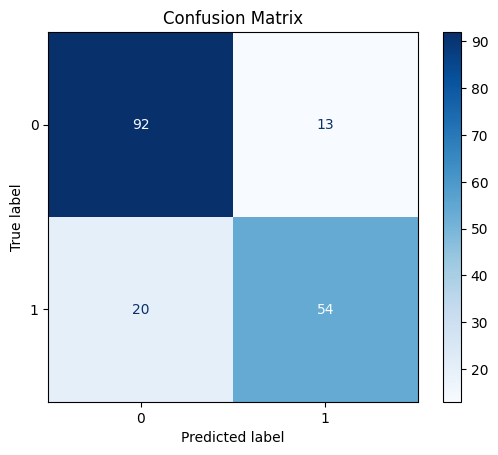

In [91]:
# -------- Choosing the Target Variable -------- 

# The features that I think are the most import for predicting survival are pclass, sex, age, fare,
# sibsp, and parch. I chose pclass because it indicates socio-economic status, sex because women and
# children are often prioritized in emergency situations, age because of it might affect
# survival prioritization or physiological ability to survive physically, fare because it might 
# be related to socio-economic status or location on boat, sibsp because number of siblings/spouses
# might affect survival prioritization, parch because of the same reason as sibsp, and chose Sibsp_Age
# because I thought that families would prioritize younger family members survival.
X = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'SibSp_Age_Interaction']]
y = titanic[['Survived']]

# Split targets and features into training/testing sets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

# -------- Building the Logistic Regression Model --------

# Initialize and Train logistic regression model
log_reg_model = sk.linear_model.LogisticRegression(max_iter = 1000) # using 1000 iterations so model converges
log_reg_model.fit(X_train, y_train)

# Model Verification
target_prediction = log_reg_model.predict(X_test)
print("Regression Coefficients: ", log_reg_model.coef_)

# -------- Model Evaluation --------

# Evaluative Metrics
# From the Evaluative Metrics you can see that the logistic model is about 82% percent accurate, meaning
# that it is correctly predicting survival for about 82% of the passengers. The model is also about 81%
# precise, meaning that out of all the passengers that were predicted to survive, 81% really did which 
# also means that the model is not producing many false positives. The model also got a 73% on recall,
# meaning that out of all the survivors, it correctly identified about 73% of them. And finally, the 
# model got about a 77% in F1-score, meaning that 77% of the time the model made a correct prediction
# across the entire dataset. Overall, I think that this is a good model for predicting the survival rate
# of passengers based on the numerical features chosen, since all evaluative metrics are above 70%.
print("Model Accuracy: ", sk.metrics.accuracy_score(y_test, target_prediction)) # outputs the proportion of correct predictions
print("Model Precision: ", sk.metrics.precision_score(y_test, target_prediction)) # outputs the proportion of passengers that actually survived out of how many were predicted to survive
print("Model Recall: ", sk.metrics.recall_score(y_test, target_prediction)) # outputs the proportion of survivors that were correctly identified as survivors
print("Model F1: ", sk.metrics.f1_score(y_test, target_prediction)) # outputs the proportion of 

# Confusion Matrix
con_matrix = sk.metrics.confusion_matrix(y_test, target_prediction)
disp = sk.metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels = log_reg_model.classes_)
disp.plot(cmap = 'Blues')
mat.pyplot.title('Confusion Matrix')

In [92]:
# ------------------------------ Part 4 - Building a Regression Model (Linear Regression) ---------------------------------------------------

In [98]:
# -------- Choosing the Target Variable for Regression --------

# The Continuous variable from the dataset that i chose as my target variable for regression
# is Fare. As for features that could predict a passengers fare, I chose to include Pclass 
# because the class of a passenger is determined by their fare in most cases, Sex because
# males tended to be more affluent than women in that day and age, Age because older
# passengers tend to have more money and can afford higher classes, SibSp_Parch_Interaction because traveling
# with others will cost more money and one would need to be able to afford the fares, Finally, I
# also included the Embarked Columns, as the fare price could also be affected by where a person
# was boarded onto the ship.
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp_Parch_Interaction', 'Embarked_Q', 'Embarked_C', 'Embarked_S']]
y = titanic['Fare']

# Split targets and features into training/testing sets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)


# -------- Building the Linear Regression Model --------

# Initialize and train Linear Regression Model
lin_reg_model = sk.linear_model.LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Model Verification
target_prediction = lin_reg_model.predict(X_test)
print("Regression Coefficients: ", lin_reg_model.coef_)

# -------- Model Evaluation --------
# Based on these Metric Evaluations, the model created does okay job of predicting
# the target variable based on the features chosen, even though the values seem
# to contradict this claim. To my understanding, since fare was scaled down, the
# errors are relatively low (which is gotten through the RMSE and MAE values)
# which suggests that the model is performing well at minimizing the error in prediction
# of fare. Further, R2, unaffected by the scaling, got a score of 44% meaning that 
# the model can explain 40% of the variance in fare and is somewhat understanding  
# the relationships between fare and the chosen features.
print("Model RMSE: ", np.sqrt(sk.metrics.mean_squared_error(y_test, target_prediction))) # average magnitude of error
print("Model MAE: ", sk.metrics.mean_absolute_error(y_test, target_prediction)) # average of the absolute differences between actual and predicted values
print("Model R2: ", sk.metrics.r2_score(y_test, target_prediction)) # how well the model explains variance in target variable


Regression Coefficients:  [-0.64685592 -0.22217009 -0.06369694  0.20280659 -0.05765776  0.2094722
 -0.15181443]
Model RMSE:  0.7064462704500666
Model MAE:  0.45499185165458117
Model R2:  0.4045179210562879


In [94]:
# ------------------------------ Part 5 -Interpretation and Discussion ---------------------------------------------------

In [95]:
# -------- Feature Importance --------

# In my Logistic model, the second most important feature was the pclass feature when determining
# survival rates. It had a coefficient of around -0.80 which suggests that a passengers class 
# had a significant impact on their chances of survival. We can also see that from the negative
# coefficient the higher class a passenger was on the greater their chance at survival and vice
# versa. The second most important feature was sex. It had a coefficient of -2 which meant that
# gender was the most important feature when talking about survival rates, and the negative value
# implies that women were prioritized in rescue efforts. The next important feature was Age. Age 
# had a coeficient of -0.4, again showing a strong correlation to survival and implying that older
# passengers had a lower chance at survival. The last important feature in my opinion is SibSp, 
# which had a coefficient of about -0.3, thus implying that a passenger with more siblings on the
# ship had a lower chance at survival than those with less or no siblings.
# In my Linear model, the most important feature when predicting the fare a passenger had to pay
# was pclass. The coefficient for Pclass was about -0.65 This implies that the higher the class a
# passenger paid for the more they had to pay. The next most important feature was Sex with a 
# coefficient of -0.22, which implies that women were predicted to pay higher fares than
# men. The next important feature was the interaction term I made, SibSp_Parch_Interation, with a 
# coefficient of 0.2, which implies that the more siblings/spouses/parents/children a passenger had
# the higher their fare was in accordance. The next important feature was embarked_C with a coefficient
# of 0.2 which implies that passengers who were boarded in C had higher fares. And the final important 
# feature in my opinion when predicting fare was Embarked_S with a coefficient of -0.15 which implies 
# that a passenger who was boarded in S were predicted to pay lower fares.

# -------- Model Performance Comparison --------

# Comparing the performance of the logistic and linear regression model that i created, I would say that
# the logistic model was a better predictor. The logistic model had an accuracy rating of around 81%
# and all the other evaluative metrics were around the same range indicating that it would predict correctly
# more often than not. The challenges that I faced when designing the logistic model was choosing the 
# best features to model passengers survival rates. I had to invent different user stories and evaluate how
# well i thought they would be predictors of survival rates which took a decent amount of time. As for how
# I could improve my logistic model, I could create more interaction terms and try to find better predictors
# for survival rates. As for my linear model, the most challenging problem was again feature selection.
# Trying to find features that affected the fares of passengers seemed simple although the model ended up
# only explaining about 40% of the variance in fare which still leaves about 60% of variance that is 
# unexplained. As for what can be improved so that the linear model is more accurately explaining the
# variance in fare is adding more interaction terms, there may be other interactions that could capture
# more relevant relationships with fare. Another potential improvement would be to add better features
# that influence fare more than the features that i am currently employing. I could try different methods
# of transforming and fitting my features and/or taret so that the data better fits and predictions are 
# easier for my model. I could also go back and address outliers in a different manner than I have to see
# if the way i am handling them now is potentially hindering my models efficacy.